In [49]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_moons, load_iris, load_diabetes
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import joblib
import torch
import pickle
import warnings
import tqdm

In [50]:
batch_size = 20
nw = 0
transform = transforms.ToTensor()

In [51]:
def our_super_transform(y):
    r = torch.zeros(10)
    r[y] = 1
    return r
transform_test = datasets.MNIST(root="data/mnist", train=True, download=True, transform=transform, target_transform=our_super_transform)

In [52]:
transform_loader = DataLoader(transform_test, batch_size=2, num_workers=nw)
for x in transform_loader:
    print(x)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])]


In [53]:

train_data = datasets.MNIST(root="data/mnist", train=True, download=True, transform=transform, target_transform=our_super_transform)
test_data = datasets.MNIST(root="data/mnist", train=False, download=True, transform=transform, target_transform=our_super_transform)

In [54]:
train_loader = DataLoader(train_data, batch_size=batch_size, num_workers=nw)
test_loader = DataLoader(test_data, batch_size=batch_size, num_workers=nw)

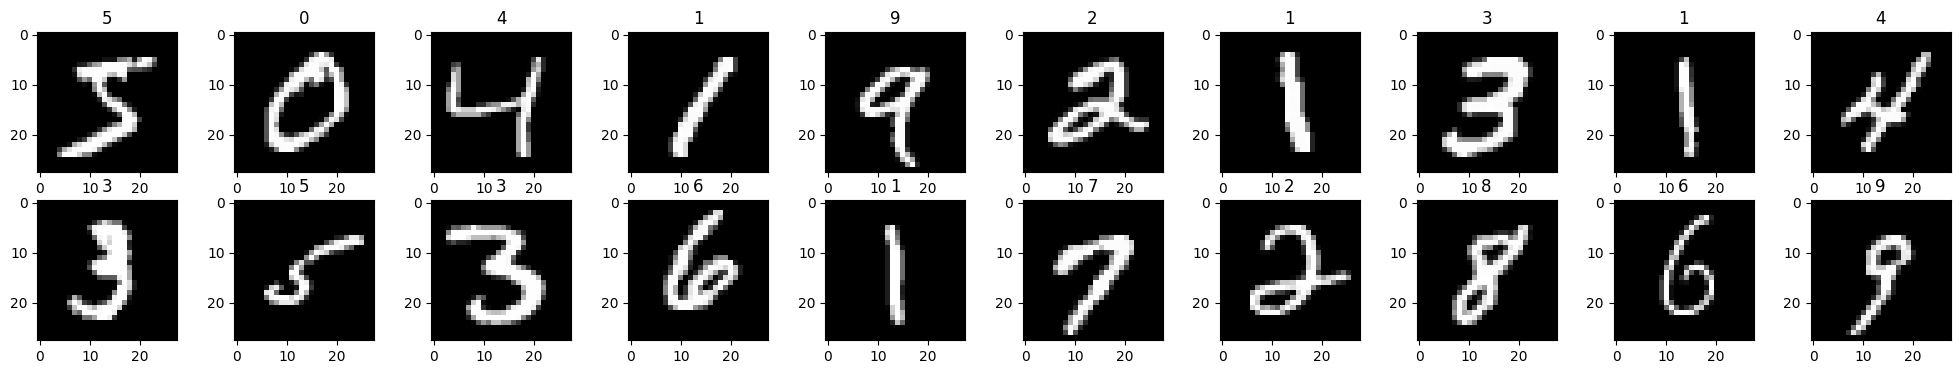

In [18]:


images = images.numpy()

%matplotlib inline

fig = plt.figure(figsize=(25,4))
for image in range(20):
    ax = fig.add_subplot(2, 10, image+1)
    ax.imshow(np.squeeze(images[image]), cmap='gray')
    ax.set_title(str(labels[image].item()))


In [93]:
class OurCNN(torch.nn.Module):

    def __init__(self, weight):
        super(OurCNN, self).__init__()

        k_height, k_width = 4, 4
        self.relu = torch.nn.ReLU()
        # 32x32
        self.conv1 = torch.nn.Conv2d(1, 4, kernel_size=(k_height, k_width))
        #self.conv1.weight = torch.nn.Parameter(weight.copy())
        self.pool1 = torch.nn.MaxPool2d(4, 4)
        self.conv2 = torch.nn.Conv2d(4, 16, kernel_size=(k_height, k_width))
        #self.conv2.weight = torch.nn.Parameter(weight.copy())
        self.pool2 = torch.nn.MaxPool2d(2, 2)

        self.fc1 = torch.nn.Linear(16 * 20, 500)
        self.fc2 = torch.nn.Linear(500, 10)
        self.softmax = torch.nn.Softmax(dim=-1)

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        self.loss_function = torch.nn.CrossEntropyLoss()


    def convs(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        return x.view(-1)


    def forward(self, x):
        x = self.convs(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.softmax(x)


    def fit(self, train_data_loader, n_epochs=100):
        self.train()
        for epoch in tqdm.tqdm(range(n_epochs)):
            sum_loss = 0
            for x, y in train_data_loader:
                print(x)
                print(y)
                self.optimizer.zero_grad()
                outputs = self(x)
                print(outputs)
                loss = self.loss_function(outputs, y)
                sum_loss += loss
                loss.backward()
                self.optimizer.step()
            if (epoch % 5 == 0):
                print(f"Epoch={epoch}, loss={sum_loss}")


In [94]:
fw1 = np.array([
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1]
])
fw2 = -fw1
fw3 = fw1.T
fw4 = -fw3
filters = np.array([fw1, fw2, fw3, fw4])

In [95]:
net = OurCNN(filters)
net

OurCNN(
  (relu): ReLU()
  (conv1): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=-1)
  (loss_function): CrossEntropyLoss()
)

In [96]:
net.fit(train_loader)

  0%|          | 0/100 [00:00<?, ?it/s]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

TypeError: only integer tensors of a single element can be converted to an index